# 📈 Predicting the Survival of Titanic Passengers

# 💾 Data

> We are going to use the `titanic-passengers` dataset. Since house price is a continues variable, this is a regression problem.

In [83]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import mpl_toolkits
import metrics
%matplotlib inline


In [5]:
df=pd.read_csv("titanic-passengers.csv",sep=";")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,343,No,2,"Collander, Mr. Erik Gustaf",male,28.0,0,0,248740,13.0000,NaN,S
1,76,No,3,"Moen, Mr. Sigurd Hansen",male,25.0,0,0,348123,7.6500,F G73,S
2,641,No,3,"Jensen, Mr. Hans Peder",male,20.0,0,0,350050,7.8542,NaN,S
3,568,No,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.0,0,4,349909,21.0750,NaN,S
4,672,No,1,"Davidson, Mr. Thornton",male,31.0,1,0,F.C. 12750,52.0000,B71,S


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    object 
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(4), object(6)
memory usage: 83.7+ KB


In [7]:
df.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [8]:
#count the number of columns and rows in the data set
df.shape

(891, 12)

In [9]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [10]:
#Finding missing values:

df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [11]:
print(df["Age"].head())
print(df["Age"].head().isnull())


0    28.0
1    25.0
2    20.0
3    29.0
4    31.0
Name: Age, dtype: float64
0    False
1    False
2    False
3    False
4    False
Name: Age, dtype: bool


In [12]:
#The total number of missing values
df.isnull().sum().sum()


866

In [13]:
df=df.drop("Cabin",axis=1)

In [14]:
df=df.drop("PassengerId",axis=1)

In [16]:
df=df.drop("Ticket",axis=1)

In [17]:
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,No,2,"Collander, Mr. Erik Gustaf",male,28.0,0,0,13.0000,S
1,No,3,"Moen, Mr. Sigurd Hansen",male,25.0,0,0,7.6500,S
2,No,3,"Jensen, Mr. Hans Peder",male,20.0,0,0,7.8542,S
3,No,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.0,0,4,21.0750,S
4,No,1,"Davidson, Mr. Thornton",male,31.0,1,0,52.0000,S


In [18]:
#Replacing missing numerical values:
df["Age"].fillna(df["Age"].mean(), inplace=True)
df

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,No,2,"Collander, Mr. Erik Gustaf",male,28.000000,0,0,13.0000,S
1,No,3,"Moen, Mr. Sigurd Hansen",male,25.000000,0,0,7.6500,S
2,No,3,"Jensen, Mr. Hans Peder",male,20.000000,0,0,7.8542,S
3,No,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.000000,0,4,21.0750,S
4,No,1,"Davidson, Mr. Thornton",male,31.000000,1,0,52.0000,S
...,...,...,...,...,...,...,...,...,...
886,Yes,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.000000,1,0,30.0708,C
887,No,3,"Sirayanian, Mr. Orsen",male,22.000000,0,0,7.2292,C
888,No,3,"Cacic, Miss. Marija",female,30.000000,0,0,8.6625,S
889,No,3,"Petroff, Mr. Pastcho (""Pentcho"")",male,29.699118,0,0,7.8958,S


In [19]:
df['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [20]:
df['Embarked'].fillna('S',inplace=True)

# 📊 # Titanic Passenger Data Visualization :

<AxesSubplot:title={'center':'Survival count plot'}, xlabel='Survived', ylabel='count'>

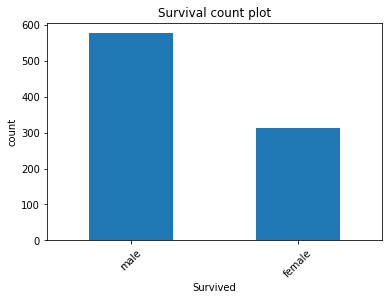

In [22]:
#Titanic Survival count plot
plt.xlabel("Survived")
plt.ylabel("count")
plt.title("Survival count plot")
vc=df["Sex"].value_counts()
vc.plot.bar(rot=45)




<AxesSubplot:title={'center':'Bar plot of Gender'}, xlabel='Sex', ylabel='count'>

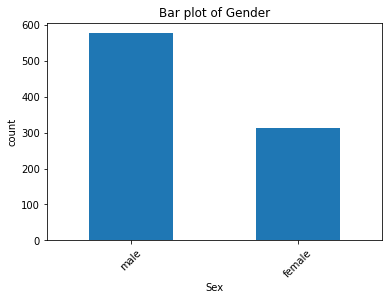

In [23]:
#Gender distribuation
plt.xlabel("Sex")
plt.ylabel("count")
plt.title("Bar plot of Gender")
vc=df["Sex"].value_counts()
vc.plot.bar(rot=45)


<AxesSubplot:xlabel='Pclass', ylabel='count'>

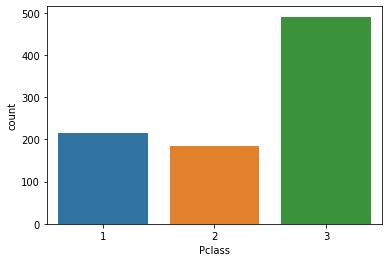

In [24]:
#Class Distribution 
sns.countplot(x='Pclass',data=df)


<AxesSubplot:xlabel='Embarked', ylabel='count'>

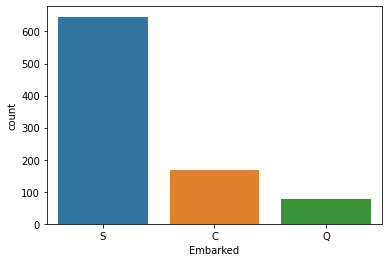

In [25]:
#Embarked:
sns.countplot(x='Embarked' ,data=df)


<AxesSubplot:title={'center':'Histogram of different ages'}, xlabel='Age', ylabel='Frequency'>

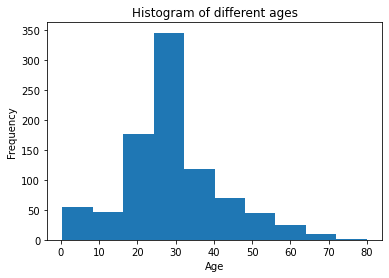

In [26]:
#Age distribution of passenger

plt.title("Histogram of different ages")
plt.xlabel("Age")
df["Age"].plot.hist()

<AxesSubplot:xlabel='Survived', ylabel='count'>

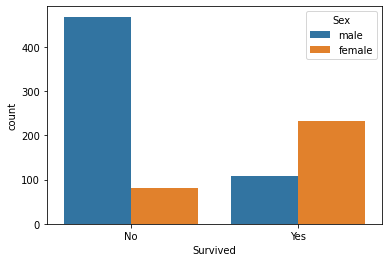

In [27]:
#Visualize survived with sex
sns.countplot(x='Survived',hue='Sex',data=df)


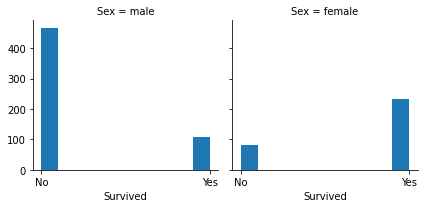

In [28]:
#Visualize survived with sex
g=sns.FacetGrid(df, col='Sex')
g.map(plt.hist, 'Survived', bins=10)


we notice that there is a high number of women survived , and really big number of man didn"t survived

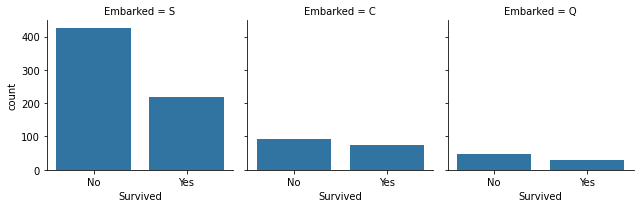

In [30]:
#Visualize survived with Embarked
g=sns.FacetGrid(df,col='Embarked')
g.map(sns.countplot, 'Survived')

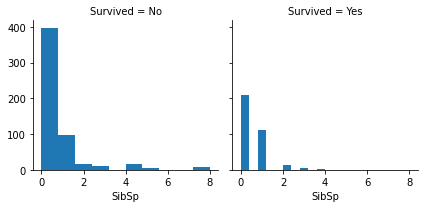

In [31]:
#Visualize Survived with SibSp
g=sns.FacetGrid(df,col='Survived')
g.map(plt.hist, 'SibSp',bins=10)

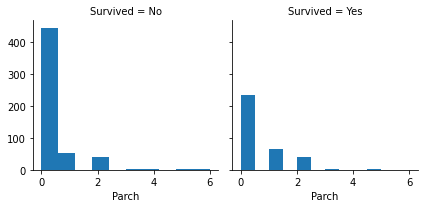

In [32]:
##Visualize Survived with Parch
g=sns.FacetGrid(df,col='Survived')
g.map(plt.hist, 'Parch',bins=10)

<AxesSubplot:xlabel='Sex', ylabel='Age'>

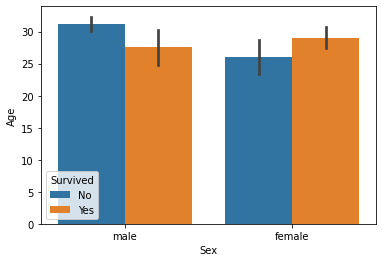

In [33]:
#The importance of age and Sex in the survival of the individuals

sns.barplot(data=df, x='Sex', y='Age', hue ='Survived')



<AxesSubplot:xlabel='Pclass', ylabel='Fare'>

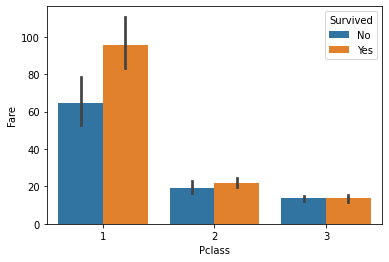

In [34]:
#The relationship between the passenger class, fare paid, and survival
sns.barplot(data=df, x='Pclass', y='Fare', hue ='Survived')

Passengers of a higher class are more likely to survive

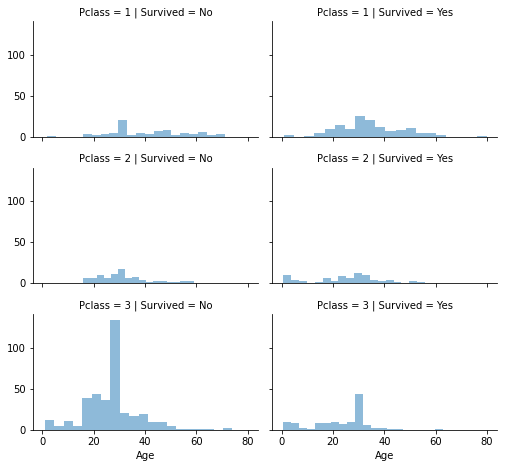

In [35]:
g = sns.FacetGrid(df, col='Survived', row='Pclass', size=2.2, aspect=1.6)
g.map(plt.hist, 'Age', alpha=.5, bins=20)
g.add_legend();




The plot above gave us a confirmation that there is a high probability that a person in pclass 3 will not survive.

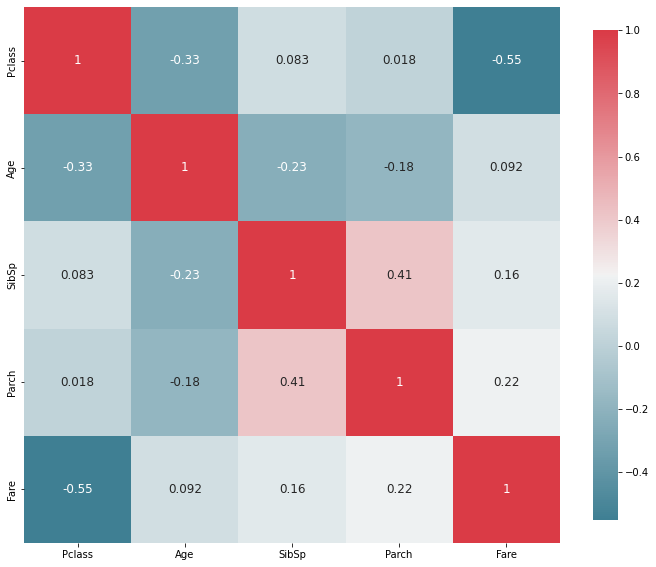

In [36]:
def plot_correlation_map( df ):

    corr = df.corr()

    s , ax = plt.subplots( figsize =( 12 , 10 ) )

    cmap = sns.diverging_palette( 220 , 10 , as_cmap = True )

    s = sns.heatmap(

        corr, 

        cmap = cmap,

        square=True, 

        cbar_kws={ 'shrink' : .9 }, 

        ax=ax, 

        annot = True, 

        annot_kws = { 'fontsize' : 12 }

        )
plot_correlation_map(df)



The heatmap is showing us the correlation between the variables in the data set.
'SibSp' and 'Parch' have a positive correlation
'Age' and 'Fare' have a negative correlation


In [38]:
#Extract 'Title' from 'Name' and convert to Numerical values
#Label encoder for this example ??????
df['Title'] = df.Name.str.extract(' ([A-Za-z]+)\.', expand=False)
df = df.drop(columns='Name')

df['Title'] = df['Title'].replace(['Dr', 'Rev', 'Col', 'Major', 'Countess', 'Sir', 'Jonkheer', 'Lady', 'Capt', 'Don'], 'Others')
df['Title'] = df['Title'].replace('Ms', 'Miss')
df['Title'] = df['Title'].replace('Mme', 'Mrs')
df['Title'] = df['Title'].replace('Mlle', 'Miss')

df['Title'] = df['Title'].map({'Master':0, 'Miss':1, 'Mr':2, 'Mrs':3, 'Others':4})
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,No,2,male,28.0,0,0,13.0000,S,2
1,No,3,male,25.0,0,0,7.6500,S,2
2,No,3,male,20.0,0,0,7.8542,S,2
3,No,3,female,29.0,0,4,21.0750,S,3
4,No,1,male,31.0,1,0,52.0000,S,2


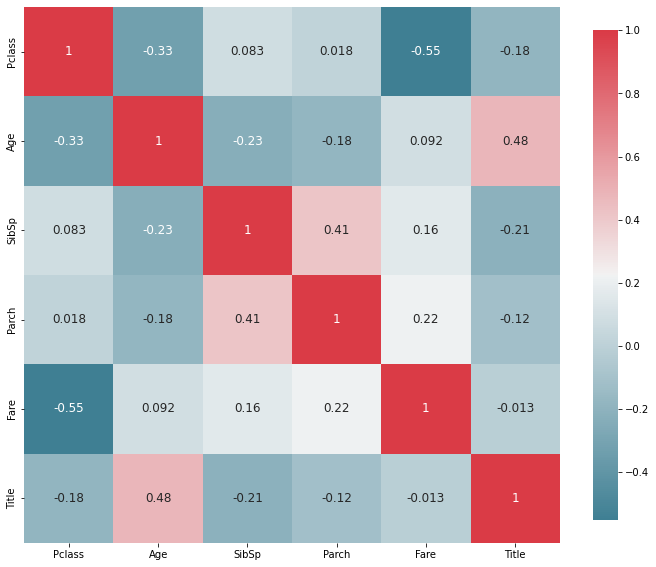

In [39]:
def plot_correlation_map( df ):

    corr = df.corr()

    s , ax = plt.subplots( figsize =( 12 , 10 ) )

    cmap = sns.diverging_palette( 220 , 10 , as_cmap = True )

    s = sns.heatmap(

        corr, 

        cmap = cmap,

        square=True, 

        cbar_kws={ 'shrink' : .9 }, 

        ax=ax, 

        annot = True, 

        annot_kws = { 'fontsize' : 12 }

        )
plot_correlation_map(df)



In [40]:
#transformation(Categorical encoding using One-Hot-Encoder)
x = pd.get_dummies(df["Sex"])
df=df.drop("Sex", axis = 1) 
df=df.join(x) 
df.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked,Title,female,male
0,No,2,28.0,0,0,13.0000,S,2,0,1
1,No,3,25.0,0,0,7.6500,S,2,0,1
2,No,3,20.0,0,0,7.8542,S,2,0,1
3,No,3,29.0,0,4,21.0750,S,3,1,0
4,No,1,31.0,1,0,52.0000,S,2,0,1


In [41]:
#Use the groupby function combined with the mean() to view the relation between Pclass and survived 

df[["Pclass", "Survived"]].groupby(["Pclass"], as_index=True).mean()


""
Pclass
1
2
3


In [43]:
#Create a new feature 'Family size' from the features 'SibSp' and 'Parch'

df['FamilySize'] = df['SibSp'] + df['Parch'] + 1
df.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked,Title,female,male,FamilySize
0,No,2,28.0,0,0,13.0000,S,2,0,1,1
1,No,3,25.0,0,0,7.6500,S,2,0,1,1
2,No,3,20.0,0,0,7.8542,S,2,0,1,1
3,No,3,29.0,0,4,21.0750,S,3,1,0,5
4,No,1,31.0,1,0,52.0000,S,2,0,1,2


In [44]:
df.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked,Title,female,male,FamilySize
0,No,2,28.0,0,0,13.0000,S,2,0,1,1
1,No,3,25.0,0,0,7.6500,S,2,0,1,1
2,No,3,20.0,0,0,7.8542,S,2,0,1,1
3,No,3,29.0,0,4,21.0750,S,3,1,0,5
4,No,1,31.0,1,0,52.0000,S,2,0,1,2


In [45]:
#transformation(Categorical encoding using One-Hot-Encoder)
y = pd.get_dummies(df["Embarked"])
df=df.drop("Embarked", axis = 1) 
df=df.join(y) 
df.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Title,female,male,FamilySize,C,Q,S
0,No,2,28.0,0,0,13.0000,2,0,1,1,0,0,1
1,No,3,25.0,0,0,7.6500,2,0,1,1,0,0,1
2,No,3,20.0,0,0,7.8542,2,0,1,1,0,0,1
3,No,3,29.0,0,4,21.0750,3,1,0,5,0,0,1
4,No,1,31.0,1,0,52.0000,2,0,1,2,0,0,1


In [46]:
#Normalisation 0 and 1
# Import MinMaxScaler
from sklearn.preprocessing import MinMaxScaler 
# Instantiate MinMaxScaler
MM_scaler = MinMaxScaler()

# Fit MM_scaler to the data
MM_scaler.fit(df[['Age']])

# Transform the data using the fitted scaler
df['Age_MM'] = MM_scaler.fit_transform(df[['Age']])

# Compare the origional and transformed column
print(df[['Age_MM', 'Age']].head())

     Age_MM   Age
0  0.346569  28.0
1  0.308872  25.0
2  0.246042  20.0
3  0.359135  29.0
4  0.384267  31.0


In [47]:
df.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Title,female,male,FamilySize,C,Q,S,Age_MM
0,No,2,28.0,0,0,13.0000,2,0,1,1,0,0,1,0.346569
1,No,3,25.0,0,0,7.6500,2,0,1,1,0,0,1,0.308872
2,No,3,20.0,0,0,7.8542,2,0,1,1,0,0,1,0.246042
3,No,3,29.0,0,4,21.0750,3,1,0,5,0,0,1,0.359135
4,No,1,31.0,1,0,52.0000,2,0,1,2,0,0,1,0.384267


# 📈 Training a Logistic Regression Model

In [48]:
##Importing libraries and reading dataset
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

df.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Title,female,male,FamilySize,C,Q,S,Age_MM
0,No,2,28.0,0,0,13.0000,2,0,1,1,0,0,1,0.346569
1,No,3,25.0,0,0,7.6500,2,0,1,1,0,0,1,0.308872
2,No,3,20.0,0,0,7.8542,2,0,1,1,0,0,1,0.246042
3,No,3,29.0,0,4,21.0750,3,1,0,5,0,0,1,0.359135
4,No,1,31.0,1,0,52.0000,2,0,1,2,0,0,1,0.384267


In [49]:
X = df[[ 'Pclass', 'Age',
       'SibSp', 'Parch', 'Fare', 'C', 'Q', 'S', 'Title', 'female', 'male']]
y = df['Survived']


In [84]:
#Splitting Data
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=0)  

logreg = LogisticRegression()   
logreg.fit(x_train, y_train)  
y_pred  = logreg.predict(x_test)  

# calculate accuracy
from sklearn import metrics
print(metrics.accuracy_score(y_test, y_pred))

0.8251121076233184


Classification accuracy is 78%

In [85]:
# examine the class distribution of the testing set (using a Pandas Series method)
y_test.value_counts()

No     144
Yes     79
Name: Survived, dtype: int64

In [64]:
# calculate null accuracy  
y_test.value_counts().head(1) / len(y_test)

No    0.64574
Name: Survived, dtype: float64

In [65]:
#Comparing the true and predicted response values

# print the first 25 true and predicted responses
print('True:', y_test.values[0:30])
print('False:', y_pred[0:30])

True: ['Yes' 'No' 'Yes' 'No' 'Yes' 'Yes' 'No' 'No' 'Yes' 'Yes' 'No' 'Yes' 'No'
 'Yes' 'No' 'No' 'No' 'Yes' 'Yes' 'No' 'Yes' 'No' 'Yes' 'No' 'No' 'Yes'
 'No' 'Yes' 'Yes' 'No']
False: ['Yes' 'No' 'Yes' 'No' 'Yes' 'Yes' 'No' 'No' 'Yes' 'Yes' 'No' 'No' 'Yes'
 'Yes' 'No' 'No' 'Yes' 'Yes' 'Yes' 'No' 'No' 'No' 'Yes' 'No' 'No' 'Yes'
 'Yes' 'Yes' 'Yes' 'No']


# 📊  Confusion matrix
Table that describes the performance of a classification model

In [71]:
Matrix = metrics.confusion_matrix(y_test, y_pred)
print(metrics.confusion_matrix(y_test, y_pred))

[[129  15]
 [ 24  55]]


True Positives (TP): 115

True Negatives (TN): 59

False Positives (FP): 24

False Negatives (FN): 25

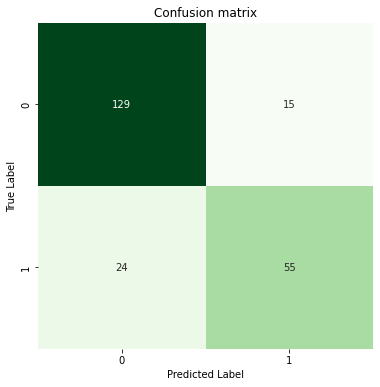

In [72]:
plt.figure(figsize=(6,6))
plt.title('Confusion matrix')
sns.heatmap(Matrix, annot=True, fmt='d', cmap=plt.cm.Greens, cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

we see in the figure above how the data is predicted.
Confusion matrix gives you a more complete picture of how your classifier is performing.


In [73]:
# save confusion matrix and slice into four pieces
confusion = metrics.confusion_matrix(y_test, y_pred)
print(confusion)
#[row, column]
TP = confusion[1, 1]
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]

[[129  15]
 [ 24  55]]


# 📊 Metrics computed from a confusion matrix

In [74]:
#Classification Accuracy:how often is the classifier correct?

print((TP + TN) / float(TP + TN + FP + FN))
print(metrics.accuracy_score(y_test, y_pred))

0.8251121076233184
0.8251121076233184


In [75]:
#Classification Error: 

classification_error = (FP + FN) / float(TP + TN + FP + FN)

print(classification_error)
print(1 - metrics.accuracy_score(y_test, y_pred))

0.17488789237668162
0.17488789237668156


In [88]:
#Sensitivity: True Positive Rate or Recall 

sensitivity = TP / float(FN + TP)

print(sensitivity)

0.6962025316455697


In [80]:
#specificity 
specificity = TN / (TN + FP)

print(specificity)
print(metrics.recall_score(y_test, y_pred))

0.8958333333333334


we notice that its Highly specific
Not sensitive

In [81]:
#False Positive Rate: 
false_positive_rate = FP / float(TN + FP)

print(false_positive_rate)
print(1 - specificity)

0.10416666666666667
0.10416666666666663


In [90]:
#Precision: 
#How "precise" is the classifier when predicting positive instances?
precision = TP / float(TP + FP)

print(precision)
print(metrics.precision_score(y_test, y_pred))

0.7857142857142857


ROC AUC curve, ROC AUC curve provides another way to evaluate and compare binary classifiers. This curve plots the true positive rate (also called the recall rate) and the false positive rate (the ratio of misclassified negative examples), rather than plotting the relationship between accuracy and recall. The ROC curve can help you choose a threshold that balances sensitivity and specificity in a way that is meaningful to your specific context AUC is the percentage of the ROC graph below the curve

In [91]:
print(metrics.roc_auc_score(y_test, y_pred))

ValueError: could not convert string to float: 'Yes'